<a href="https://colab.research.google.com/github/Siddhantp08/html-portfolio/blob/main/Satellite_Imagery_Segmentation_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install patchify


In [2]:
pip install matplotlib


In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [4]:
minmaxscaler = MinMaxScaler() #define min max

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls -lah '/content/drive/MyDrive/Dubai dataset/archive/Semantic segmentation dataset'


total 33K
-rw------- 1 root root  548 Jul 22 05:47  classes.json
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 1'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 2'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 3'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 4'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 5'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 6'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 7'
drwx------ 2 root root 4.0K Jul 22 05:55 'Tile 8'


In [7]:
dataset_root_folder = '/content/drive/MyDrive/Dubai dataset/archive/'

In [8]:
dataset_name = "Semantic segmentation dataset"

In [9]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
     images = os.listdir(path)
     #print(images)
     for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):
       #print(image_name)
       a = True

In [10]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

In [11]:
image_patch_size = 256

In [12]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [13]:
len(image_patches)

2

In [14]:
image_x = image_patches[0, 0, :, :]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [15]:
image_y.shape

(1, 256, 256, 3)

In [16]:
print(type(image))

<class 'numpy.ndarray'>


In [17]:
type(Image.fromarray(image))

PIL.Image.Image

In [18]:
image.shape


(644, 797, 3)

In [19]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [20]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'

  for tile_id in range(1, 8):
    for image_id in range(1, 20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0, 0, size_x, size_y))
        #print("({}, {})".format(image.size[0], image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            #individual_patched_image = patched_images[i, j, :, :]
          # print(individual_patched_iamge.shape)
            #individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            #individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)

            #print(image_patches.shape)
            if image_type == 'images':
              individual_patched_image = patched_images[i, j, :, :]
          # print(individual_patched_iamge.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i, j, :, :]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)



             #for i in range(0, size_x, image_patch_size):
             #print(image.shape)

In [21]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [22]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

In [23]:
#image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

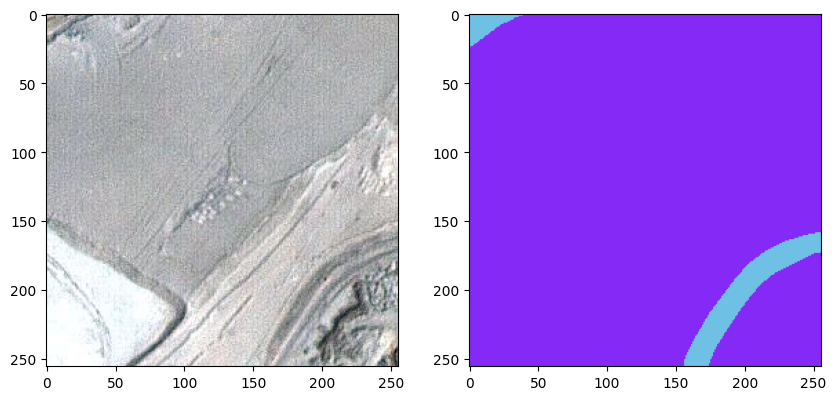

In [24]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])


In [25]:
class_building = "#3C1098"
class_building = class_building.lstrip("#")
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = "#8429F6"
class_land = class_land.lstrip("#")
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = "#6EC1E4"
class_road = class_road.lstrip("#")
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = "#FEDD3A"
class_vegetation = class_vegetation.lstrip("#")
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = "#E2A929"
class_water = class_water.lstrip("#")
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = "#9B9B9B"
class_unlabeled = class_unlabeled.lstrip("#")
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [26]:
[{"name":"mask_dataset","value":"945 items [array([[[132,  41, …","type":"list"}]

[{'name': 'mask_dataset',
  'value': '945 items [array([[[132,  41, …',
  'type': 'list'}]

In [27]:
mask_dataset.shape

(945, 256, 256, 3)

In [28]:
labels = individual_patched_mask

In [29]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype = np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment = label_segment[:, :, 0]
  #print(label_segment)
  return label_segment

In [30]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [31]:
print(len(labels))

945


In [32]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
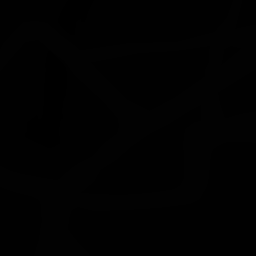

In [33]:
labels[3]

In [34]:
labels = np.expand_dims(labels, axis=3)

In [35]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

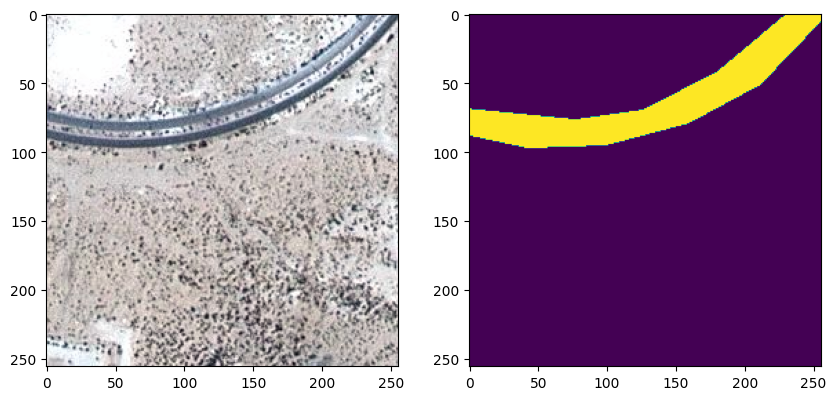

In [36]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][: ,:, 0])


In [37]:
total_classes = len(np.unique(labels))

In [38]:
total_classes

6

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
labels_categorical_dataset = to_categorical(labels, num_classes = total_classes)

In [41]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [42]:
master_training_dataset = image_dataset

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_test_split(master_training_dataset, labels_categorical_dataset, test_size = 10)

[[array([[[0.80632411, 0.78823529, 0.79116466],
          [0.89328063, 0.88627451, 0.88353414],
          [1.        , 1.        , 1.        ],
          ...,
          [0.94466403, 0.96078431, 0.97991968],
          [0.98023715, 0.99607843, 1.        ],
          [0.97233202, 0.98823529, 1.        ]],
  
         [[0.83003953, 0.81176471, 0.81526104],
          [0.86561265, 0.85882353, 0.85542169],
          [0.98023715, 0.97254902, 0.97188755],
          ...,
          [0.94071146, 0.95686275, 0.97590361],
          [0.95256917, 0.96862745, 0.98795181],
          [0.92885375, 0.94509804, 0.96385542]],
  
         [[0.80632411, 0.78431373, 0.79919679],
          [0.92885375, 0.90980392, 0.91566265],
          [1.        , 0.99607843, 1.        ],
          ...,
          [0.96837945, 0.98431373, 1.        ],
          [0.9486166 , 0.96470588, 0.98393574],
          [0.93675889, 0.95294118, 0.97188755]],
  
         ...,
  
         [[0.87747036, 0.87843137, 0.87550201],
          [0.8

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

# Check if master_training_dataset and labels_categorical_dataset are defined
try:
    # Convert master_training_dataset to a NumPy array
    master_training_dataset = np.array(master_training_dataset)
    labels_categorical_dataset = np.array(labels_categorical_dataset)
except NameError:
    print("master_training_dataset or labels_categorical_dataset is not defined.")
    raise

# Print shapes to ensure they are compatible
print("master_training_dataset shape:", master_training_dataset.shape)
print("labels_categorical_dataset shape:", labels_categorical_dataset.shape)

# Check if the number of samples match
if master_training_dataset.shape[0] != labels_categorical_dataset.shape[0]:
    raise ValueError("The number of samples in master_training_dataset and labels_categorical_dataset do not match.")

# Split the data into training and testing sets
try:
    X_train, X_test, Y_train, Y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)
except Exception as e:
    print(f"An error occurred during train_test_split: {e}")
    raise

# Print shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


#import numpy as np
#from sklearn.model_selection import train_test_split

## Convert master_training_dataset to a NumPy array
#master_training_dataset = np.array(master_training_dataset)

## Split the data into training and testing sets
#X_train, X_test, Y_train, Y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

master_training_dataset shape: (945, 256, 256, 3)
labels_categorical_dataset shape: (945, 256, 256, 6)
X_train shape: (803, 256, 256, 3)
X_test shape: (142, 256, 256, 3)
Y_train shape: (803, 256, 256, 6)
Y_test shape: (142, 256, 256, 6)


In [47]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]

In [48]:
print(image_height)
print(image_width)
print(image_channels)

256
256
3


In [49]:
!pip install -U segmentation_models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [50]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [51]:
from keras import backend as K

In [52]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true * y_pred)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true) + K.sum(y_pred) - intersection + 1.0)
  return final_coef_value

In [53]:
def multi_unet_model(n_classes = 5, image_height = 256, image_width = 256, image_channels = 1):
  inputs = Input((image_height, image_width, image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c1)
  p1 = MaxPooling2D((2, 2))(c1)

  c2 = Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c2)
  p2 = MaxPooling2D((2, 2))(c2)

  c3 = Conv2D(64, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c3)
  p3 = MaxPooling2D((2, 2))(c3)

  c4 = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c4)
  p4 = MaxPooling2D((2, 2))(c4)

  c5 = Conv2D(256, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c5)

  u6 = Conv2DTranspose(128, (2, 2), strides = (2,2), padding = "same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c6)

  u7 = Conv2DTranspose(64, (2, 2), strides = (2,2), padding = "same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c7)

  u8 = Conv2DTranspose(32, (2, 2), strides = (2,2), padding = "same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c8)

  u9 = Conv2DTranspose(16, (2, 2), strides = (2,2), padding = "same")(c8)
  u9 = concatenate([u9, c1], axis = 3)
  c9 = Conv2D(16, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3, 3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(c9)

  outputs =  Conv2D(n_classes, (1, 1), activation = "softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [54]:
metrics = ["accuracy", jaccard_coef]

In [55]:
def get_deep_learning_model():
  return multi_unet_model(n_classes = total_classes,
                          image_height = image_height,
                          image_width = image_width,
                          image_channels = image_channels)

In [56]:
model = get_deep_learning_model()

In [57]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [58]:
#Generating loss function

weigths = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [59]:

!pip install tensorflow
!pip install segmentation-models

In [60]:
from keras.utils import CustomObjectScope # Changed import to CustomObjectScope

In [61]:
!pip install -q keras==2.5
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
import os
os.environ['SM_FRAMEWORK'] = 'tf.keras'

ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0rc1, 2.15.0, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.0.4, 3.0.5, 3.1.0, 3.1.1, 3.2.0, 3.2.1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.4.0, 3.4.1)
ERROR: No matching distribution found for keras==2.5
ERROR: Could not find a version that satisfies the requirement 

In [62]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [63]:
dice_loss = sm.losses.DiceLoss(class_weights = weigths)

In [64]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [65]:
total_loss = dice_loss + (1 * focal_loss)

In [66]:
#model compilation
import tensorflow as tf

In [67]:
tf.keras.backend.clear_session()

In [68]:
model.compile(optimizer = "adam", loss = total_loss, metrics = metrics )

In [69]:
model

In [70]:
model_history = model.fit(X_train, Y_train,
                          batch_size = 16,
                          verbose = 1,
                          epochs = 50,
                          validation_data = (X_test, Y_test),
                          shuffle = "False")

Epoch 1/50
51/51 [==============================] - 88s 2s/step - loss: 1.0048 - accuracy: 0.5012 - jaccard_coef: 0.2343 - val_loss: 0.9897 - val_accuracy: 0.6679 - val_jaccard_coef: 0.3154
Epoch 2/50
51/51 [==============================] - 81s 2s/step - loss: 0.9806 - accuracy: 0.6764 - jaccard_coef: 0.3823 - val_loss: 0.9694 - val_accuracy: 0.6995 - val_jaccard_coef: 0.4398
Epoch 3/50
51/51 [==============================] - 80s 2s/step - loss: 0.9654 - accuracy: 0.7057 - jaccard_coef: 0.4530 - val_loss: 0.9668 - val_accuracy: 0.6996 - val_jaccard_coef: 0.4614
Epoch 4/50
51/51 [==============================] - 80s 2s/step - loss: 0.9595 - accuracy: 0.7263 - jaccard_coef: 0.4757 - val_loss: 0.9526 - val_accuracy: 0.7569 - val_jaccard_coef: 0.5117
Epoch 5/50
51/51 [==============================] - 79s 2s/step - loss: 0.9529 - accuracy: 0.7438 - jaccard_coef: 0.5059 - val_loss: 0.9541 - val_accuracy: 0.7559 - val_jaccard_coef: 0.5285
Epoch 6/50
51/51 [==============================] 

In [71]:
history_a = model_history

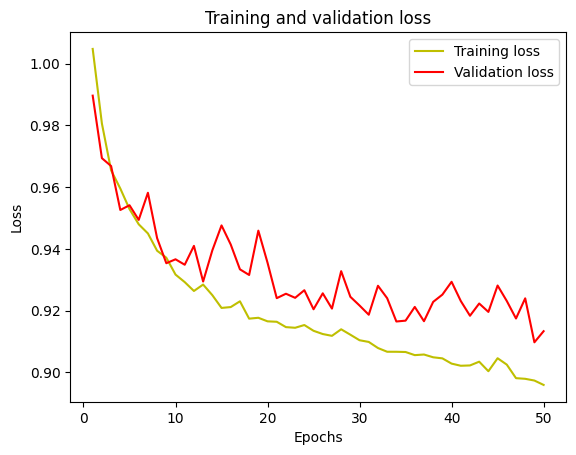

In [72]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = "Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [73]:
val_loss

[0.9896502494812012,
 0.9693829417228699,
 0.9668315649032593,
 0.952585756778717,
 0.9541252851486206,
 0.9493805766105652,
 0.9581649303436279,
 0.9434572458267212,
 0.9353349804878235,
 0.9366049766540527,
 0.9348401427268982,
 0.9409537315368652,
 0.9293975830078125,
 0.9394996762275696,
 0.947587788105011,
 0.9413960576057434,
 0.9333557486534119,
 0.9315246939659119,
 0.9458900690078735,
 0.9354893565177917,
 0.9240078926086426,
 0.9254419207572937,
 0.9241161346435547,
 0.9265847206115723,
 0.9204075932502747,
 0.9255767464637756,
 0.9206229448318481,
 0.9327574968338013,
 0.9244474768638611,
 0.9216191172599792,
 0.9186342358589172,
 0.9280266761779785,
 0.9239922165870667,
 0.9164467453956604,
 0.916717529296875,
 0.9211668372154236,
 0.9165351986885071,
 0.922801673412323,
 0.9251534938812256,
 0.9293118119239807,
 0.9230858087539673,
 0.9183046817779541,
 0.9222734570503235,
 0.9195513725280762,
 0.9281052947044373,
 0.9230865836143494,
 0.9174175262451172,
 0.92394888401031

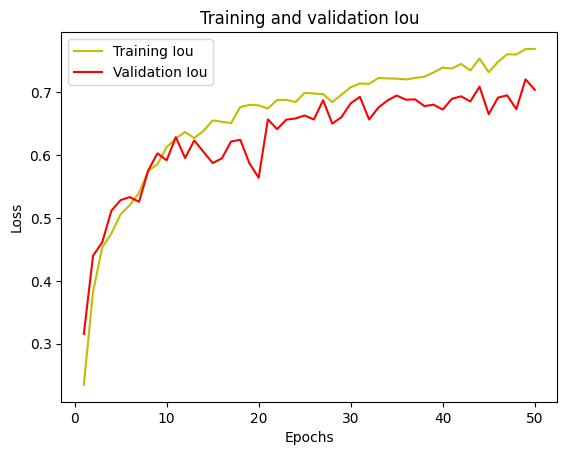

In [74]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, jaccard_coef, 'y', label = "Training Iou")
plt.plot(epochs, val_jaccard_coef, 'r', label = "Validation Iou")
plt.title('Training and validation Iou')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [75]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [76]:
y_pred = model.predict(X_test)

5/5 [==============================] - 2s 350ms/step


In [77]:
len(y_pred)

142

In [78]:
y_pred_argmax = np.argmax(y_pred, axis = 3)

In [79]:
len(y_pred_argmax)

142

In [80]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [81]:
y_test_argmax = np.argmax(Y_test, axis = 3)

In [82]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [83]:
import random

In [90]:
test_image_number = random.randint(0, len(X_test))
test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]
test_image_input = np.expand_dims(test_image, 0)
prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis = 3)
predicted_image = predicted_image[0, :, :]


1/1 [==============================] - 0s 50ms/step


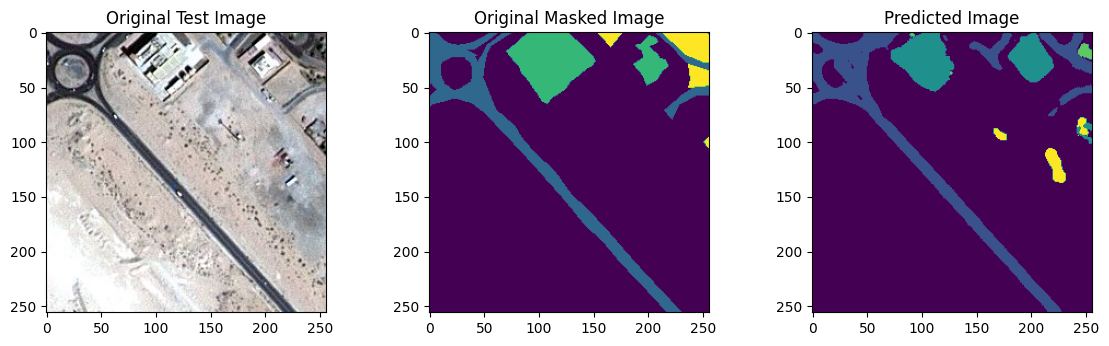

In [91]:
plt.figure(figsize=(14, 8))
plt.subplot(231)
plt.title("Original Test Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked Image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [93]:
model.save("Satelite_Image_Segmentation_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jul 29 08:32 .
drwxr-xr-x 1 root root 4.0K Jul 29 07:15 ..
drwxr-xr-x 4 root root 4.0K Jul 25 13:17 .config
drwx------ 5 root root 4.0K Jul 29 07:19 drive
drwxr-xr-x 1 root root 4.0K Jul 25 13:18 sample_data
-rw-r--r-- 1 root root  23M Jul 29 08:32 Satelite_Image_Segmentation_Model.h5
